# Loading modules

In [2]:
import csv
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt




# Loading the data 

In [47]:

dataPath = "/Users/inclusive/creativeEnergy-/LabFit/training_data_dc.csv"
data = pd.read_csv(dataPath)

# rename specific cols 
data.rename(columns={"LPM Rota":"LPM_Rota", 'cd':'dcoef'}, inplace=True)
data0=data.drop(columns={'periph_ch1', 'periph_ch1_lpm',})
print(data0.columns)
		
# labFit CONSTANTs
A=0.21334
B=0.14933
C=0.033616
D=0.023546

# standard constants
output_lpm=100000  # atm pressure in Pa
Tsb=30.66         # 
c=273.15          # Kelvin temp correction 

Index(['Static Pressure', 'LPM_Rota', 'temp_mcu', 'Static_Pa', 'SP_mV',
       'DP_mV', 'Differential_Pa', 'Flow_lph', 'SB lpm', 'Accuracy', 'Error',
       'ideal flow', 'dcoef'],
      dtype='object')


# Meta-functions for computations 

In [39]:
# Y=A/X2+B*EXP(C*X1)+D/X2**2
#Y=A*X1**(B*X2**C)+D/X2

#data['labfit'] = data.apply(labfit_model, axis=1)
#data['labfit0'] = data.apply(lambda row: labfit_function(row), axis=1)

def labfit_function(row):
    return  -1 * A * row['Static_Pa'] ** (B * row['Differential_Pa']**C) + D / row['Differential_Pa']

labfit_model = lambda row: A*row.Static_Pa**(B*row.Differential_Pa**C) + D/row.Differential_Pa

labfit_model0 = lambda row: A*row.Differential_Pa**(B*row.Static_Pa**C) + D/row.Static_Pa

LPM_rota_normalization = lambda row: row.LPM_Rota *( row.Static_Pa + output_lpm)/ output_lpm*(Tsb/(row.temp_mcu + c))
SB_lph = lambda row: row.Flow_lph/60 

# Computing desired variables to from system
# reference readings and in house readings 

In [49]:
data0['labfit'] = data0.apply(labfit_model, axis=1)
data0['LPM_rota_norm'] = data0.apply(LPM_rota_normalization, axis=1)
data0['SB_lph'] = data0.apply(SB_lph, axis=1)

In [50]:
data0.columns

Index(['Static Pressure', 'LPM_Rota', 'temp_mcu', 'Static_Pa', 'SP_mV',
       'DP_mV', 'Differential_Pa', 'Flow_lph', 'SB lpm', 'Accuracy', 'Error',
       'ideal flow', 'dcoef', 'labfit', 'labfit0', 'LPM_rota_norm', 'SB_lph'],
      dtype='object')

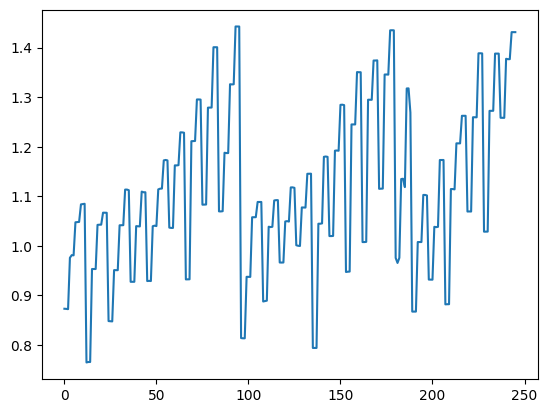

In [35]:
plt.plot(data['labfit'])
#plt.plot(data['labfit0']/data['Static_Pa'])

Text(0, 0.5, 'DC values')

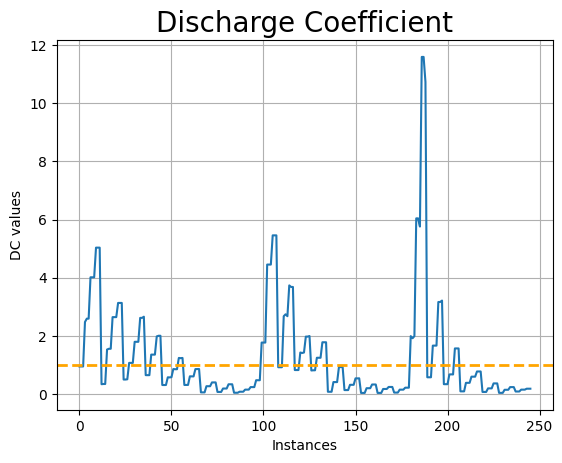

In [21]:
# the structure in CD variable in the data is inherited from the models computation
# or is inherited from some other source?
# DC appears to be some regularization of the model values
# the model values are negative
# why do we have values of 12 in the data? I thought the max was 1 in CD data?
# what are the reasonable values of Discharge coefficient (min, max)
# what do the (3) peaks represent, what is accounting for the structure? 


plt.plot(data['cd'])
plt.axhline(y=1, linestyle='--', color='orange', linewidth=2.0)
plt.grid(True)
plt.title('Discharge Coefficient', fontsize=20)
plt.xlabel('Instances', fontsize=10)
plt.ylabel('DC values', fontsize=10)

In [37]:
max(data['cd'])

11.58784064